In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimentanalysisforfinancialnews-modified/all-data.csv


In [2]:
df=pd.read_csv('../input/sentimentanalysisforfinancialnews-modified/all-data.csv',encoding = "ISO-8859-1")
df.head()

,Sentiment,News Headline,Unnamed: 2,Unnamed: 3
0,neutral,"According to Gran , the company has no plans t...",NaN,NaN
1,neutral,Technopolis plans to develop in stages an area...,NaN,NaN
2,negative,The international electronic industry company ...,NaN,NaN
3,positive,With the new production plant the company woul...,NaN,NaN
4,positive,According to the company 's updated strategy f...,NaN,NaN


In [3]:
df.isna().sum()

Sentiment           0
News Headline       0
Unnamed: 2       4837
Unnamed: 3       4844
dtype: int64

In [4]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

In [5]:
y=df['Sentiment'].values
y.shape

(4846,)

In [6]:
x=df['News Headline'].values
x.shape

(4846,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
(x_train, x_test, y_train, y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape


(2907,)

In [9]:
x_test.shape 
y_test.shape

(1939,)

In [10]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [11]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})

In [12]:
df_train=pd.concat([df1,df2], axis=1)

In [13]:
df_train.head()

,news,sentiment
0,Salcomp 's charger manufacturing plant in Indi...,neutral
1,Total operating revenue grew by 27.6 % year-on...,positive
2,Registration is required .,neutral
3,"Motorola , the world 's second-largest maker o...",neutral
4,This new partnership agreement represents a si...,positive


In [14]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [15]:
df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'sentiment'})


In [16]:
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,The employee negotiations are to address measu...,neutral
1,Metsa-Botnia will sell 82.1 % of its stake in ...,neutral
2,Increased trust of our clients in YIT can be s...,positive
3,"ALEXANDRIA , Va. , Aug. 27 -- Timo Vataja of T...",neutral
4,Neste Oil said it will build a biodiesel produ...,neutral


In [17]:
#removing punctiations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""
    for i in text:
        if i not in string.punctuation:
            ans+=i
    return ans

In [19]:
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [20]:
df_train.head()

,news,sentiment
0,Salcomp s charger manufacturing plant in India...,neutral
1,Total operating revenue grew by 276 yearonyea...,positive
2,Registration is required,neutral
3,Motorola the world s secondlargest maker of c...,neutral
4,This new partnership agreement represents a si...,positive


In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def generate_N_grams(text, ngram=1):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
    print("Sentence after removing stopwords:", words)
    temp=zip(*[words[i:] for i in range(0, ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [23]:
#sample!
generate_N_grams("The sun rises in the east", 2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [24]:
from collections import defaultdict

In [25]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [26]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text):
        positiveValues[word]+=1

Sentence after removing stopwords: ['Total', 'operating', 'revenue', 'grew', '276', '', 'yearonyear', 'EUR61m', '']
Sentence after removing stopwords: ['This', 'new', 'partnership', 'agreement', 'represents', 'significant', 'milestone', 'parties', '']
Sentence after removing stopwords: ['Based', 'upon', 'unique', 'fiber', 'expertise', 'innovative', 'approach', '', 'company', 'strong', 'market', 'position', 'several', 'business', 'areas', 'operates', '']
Sentence after removing stopwords: ['With', 'acquisition', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '', 'said', '']
Sentence after removing stopwords: ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', 'result', 'ever', '']
Sentence after removing stopwords: ['Finnair', 'expands', '', 'Finnair', 'plans', 'add', 'flights', 'routes', 'Hong', 'Kong', '', 'India', 'Russia', '']
Sentence after removing stopwords: ['The', 'last', 'quarter', 'best', 'quar

In [27]:
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text):
        negativeValues[word]+=1

Sentence after removing stopwords: ['HELSINKI', 'AFX', '', 'Kesko', 'Corp', 'expected', 'report', 'lower', 'second', 'quarter', 'EPS', 'today', 'due', 'tax', 'charges', '', 'earnings', 'lines', 'seen', 'higher', 'yearonyear', '', 'analysts', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR28', '2', 'net', 'turnover', 'increased', 'EUR313', '42', '', 'compared', 'financial', 'year', '2004', '']
Sentence after removing stopwords: ['Export', 'declined', '6', 'percent', '164', 'million', 'liters', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', '', 'largest', 'papermaker', '', 'October', 'said', 'would', 'close', 'four', 'mills', '']
Sentence after removing stopwords: ['Initially', '', 'company', 'said', 'maximum', '15', 'people', 'would', 'made', 'redundant', 'parent', 'company', '15', 'subsidiaries', '']
Sentence after removing stopwords: ['Rivals', 'say', 'Qualcomm', 'fewer', 'patents', '3G', 'phones', 'earlier

In [28]:
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text):
        neutralValues[word]+=1

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['Registration', 'required', '']
Sentence after removing stopwords: ['Motorola', '', 'world', 'secondlargest', 'maker', 'cell', 'phones', '', 'unveiled', 'new', 'phone', 'Tuesday', 'bid', 'resurrect', 'ailing', 'handset', 'business', '']
Sentence after removing stopwords: ['Ruukki', 'restructuring', 'commercial', 'industrial', 'construction', 'operations', 'pursuit', 'permanent', 'improvements', 'whilst', 'adjusting', 'operations', 'market', 'conditions', '']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed'

In [29]:
df_positive=pd.DataFrame(sorted(positiveValues.items(), key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(), key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),  key=lambda x:x[1],reverse=True))

In [30]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [31]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [32]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

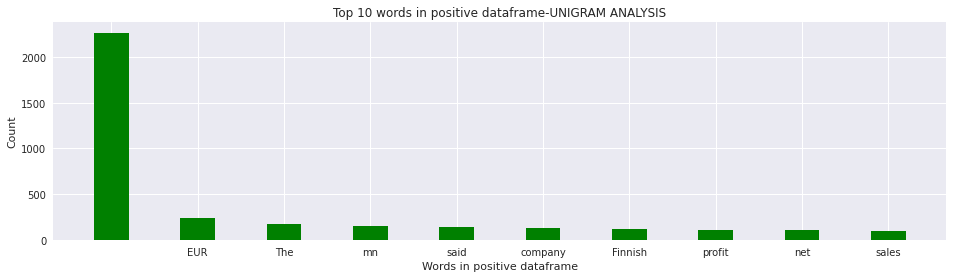

In [33]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

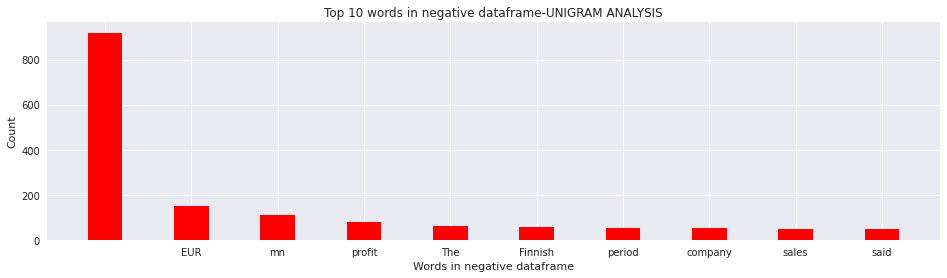

In [34]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red', width=0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

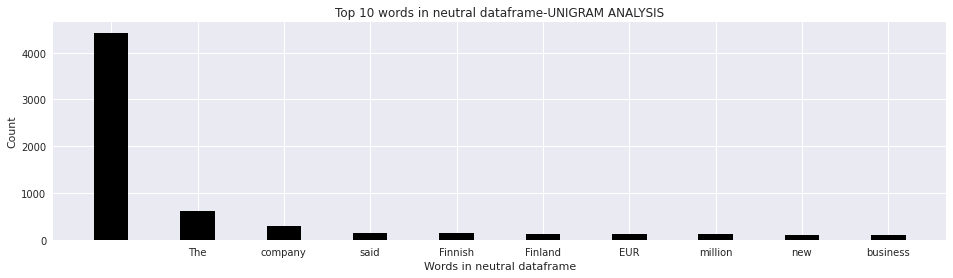

In [35]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='black', width=0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [36]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [37]:
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1

Sentence after removing stopwords: ['Total', 'operating', 'revenue', 'grew', '276', '', 'yearonyear', 'EUR61m', '']
Sentence after removing stopwords: ['This', 'new', 'partnership', 'agreement', 'represents', 'significant', 'milestone', 'parties', '']
Sentence after removing stopwords: ['Based', 'upon', 'unique', 'fiber', 'expertise', 'innovative', 'approach', '', 'company', 'strong', 'market', 'position', 'several', 'business', 'areas', 'operates', '']
Sentence after removing stopwords: ['With', 'acquisition', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '', 'said', '']
Sentence after removing stopwords: ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', 'result', 'ever', '']
Sentence after removing stopwords: ['Finnair', 'expands', '', 'Finnair', 'plans', 'add', 'flights', 'routes', 'Hong', 'Kong', '', 'India', 'Russia', '']
Sentence after removing stopwords: ['The', 'last', 'quarter', 'best', 'quar

In [38]:
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1

        

Sentence after removing stopwords: ['HELSINKI', 'AFX', '', 'Kesko', 'Corp', 'expected', 'report', 'lower', 'second', 'quarter', 'EPS', 'today', 'due', 'tax', 'charges', '', 'earnings', 'lines', 'seen', 'higher', 'yearonyear', '', 'analysts', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR28', '2', 'net', 'turnover', 'increased', 'EUR313', '42', '', 'compared', 'financial', 'year', '2004', '']
Sentence after removing stopwords: ['Export', 'declined', '6', 'percent', '164', 'million', 'liters', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', '', 'largest', 'papermaker', '', 'October', 'said', 'would', 'close', 'four', 'mills', '']
Sentence after removing stopwords: ['Initially', '', 'company', 'said', 'maximum', '15', 'people', 'would', 'made', 'redundant', 'parent', 'company', '15', 'subsidiaries', '']
Sentence after removing stopwords: ['Rivals', 'say', 'Qualcomm', 'fewer', 'patents', '3G', 'phones', 'earlier

In [39]:
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text, 2):
        neutralValues2[word]+=1

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['Registration', 'required', '']
Sentence after removing stopwords: ['Motorola', '', 'world', 'secondlargest', 'maker', 'cell', 'phones', '', 'unveiled', 'new', 'phone', 'Tuesday', 'bid', 'resurrect', 'ailing', 'handset', 'business', '']
Sentence after removing stopwords: ['Ruukki', 'restructuring', 'commercial', 'industrial', 'construction', 'operations', 'pursuit', 'permanent', 'improvements', 'whilst', 'adjusting', 'operations', 'market', 'conditions', '']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed'

In [40]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(), key=lambda x:x[1],reverse=True))

In [41]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [42]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [43]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

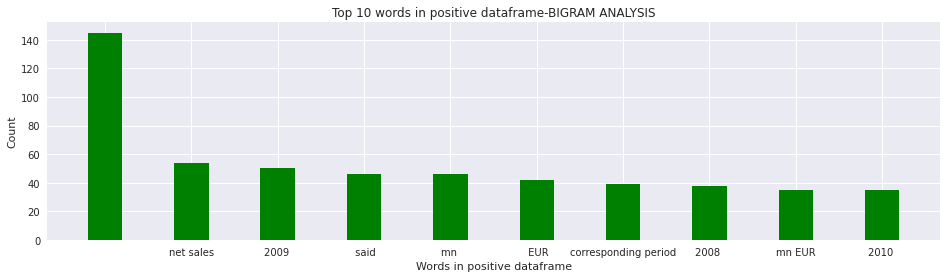

In [44]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

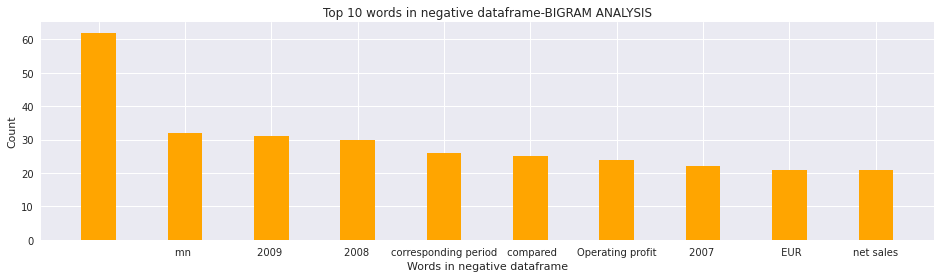

In [45]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='orange', width=0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negativa-unigram.png")
plt.show()

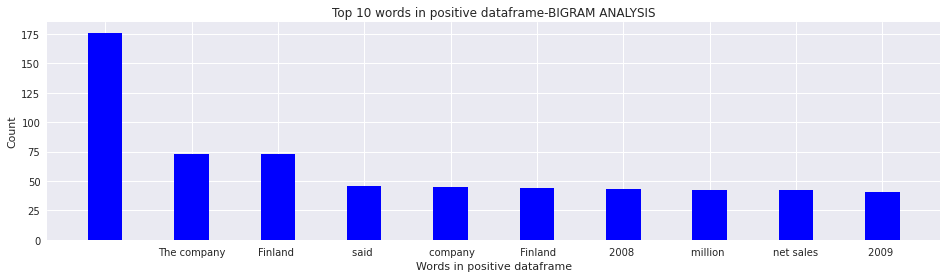

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='blue', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

In [47]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

In [48]:
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text, 3):
        positiveValues3[word]+=1

Sentence after removing stopwords: ['Total', 'operating', 'revenue', 'grew', '276', '', 'yearonyear', 'EUR61m', '']
Sentence after removing stopwords: ['This', 'new', 'partnership', 'agreement', 'represents', 'significant', 'milestone', 'parties', '']
Sentence after removing stopwords: ['Based', 'upon', 'unique', 'fiber', 'expertise', 'innovative', 'approach', '', 'company', 'strong', 'market', 'position', 'several', 'business', 'areas', 'operates', '']
Sentence after removing stopwords: ['With', 'acquisition', '', 'company', 'expand', 'offering', 'North', '', 'Central', 'South', 'America', '', 'said', '']
Sentence after removing stopwords: ['According', 'CEO', 'Kai', 'Telanne', '', 'company', 'newspapers', 'achieved', 'best', 'financial', 'result', 'ever', '']
Sentence after removing stopwords: ['Finnair', 'expands', '', 'Finnair', 'plans', 'add', 'flights', 'routes', 'Hong', 'Kong', '', 'India', 'Russia', '']
Sentence after removing stopwords: ['The', 'last', 'quarter', 'best', 'quar

In [49]:
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text, 3):
        negativeValues3[word]+=1

Sentence after removing stopwords: ['HELSINKI', 'AFX', '', 'Kesko', 'Corp', 'expected', 'report', 'lower', 'second', 'quarter', 'EPS', 'today', 'due', 'tax', 'charges', '', 'earnings', 'lines', 'seen', 'higher', 'yearonyear', '', 'analysts', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', '12month', 'period', 'decreased', 'EUR28', '2', 'net', 'turnover', 'increased', 'EUR313', '42', '', 'compared', 'financial', 'year', '2004', '']
Sentence after removing stopwords: ['Export', 'declined', '6', 'percent', '164', 'million', 'liters', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'Oyj', '', 'largest', 'papermaker', '', 'October', 'said', 'would', 'close', 'four', 'mills', '']
Sentence after removing stopwords: ['Initially', '', 'company', 'said', 'maximum', '15', 'people', 'would', 'made', 'redundant', 'parent', 'company', '15', 'subsidiaries', '']
Sentence after removing stopwords: ['Rivals', 'say', 'Qualcomm', 'fewer', 'patents', '3G', 'phones', 'earlier

In [50]:
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text, 3):
        negativeValues3[word]+=1

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['Registration', 'required', '']
Sentence after removing stopwords: ['Motorola', '', 'world', 'secondlargest', 'maker', 'cell', 'phones', '', 'unveiled', 'new', 'phone', 'Tuesday', 'bid', 'resurrect', 'ailing', 'handset', 'business', '']
Sentence after removing stopwords: ['Ruukki', 'restructuring', 'commercial', 'industrial', 'construction', 'operations', 'pursuit', 'permanent', 'improvements', 'whilst', 'adjusting', 'operations', 'market', 'conditions', '']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed'

In [51]:
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text, 3):
        neutralValues3[word]+=1

Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', '', 'eastern', 'part', 'India', '']
Sentence after removing stopwords: ['Registration', 'required', '']
Sentence after removing stopwords: ['Motorola', '', 'world', 'secondlargest', 'maker', 'cell', 'phones', '', 'unveiled', 'new', 'phone', 'Tuesday', 'bid', 'resurrect', 'ailing', 'handset', 'business', '']
Sentence after removing stopwords: ['Ruukki', 'restructuring', 'commercial', 'industrial', 'construction', 'operations', 'pursuit', 'permanent', 'improvements', 'whilst', 'adjusting', 'operations', 'market', 'conditions', '']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses', '']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed'

In [52]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(), key=lambda x:x[1], reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(), key=lambda x:x[1], reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [53]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [54]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [55]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

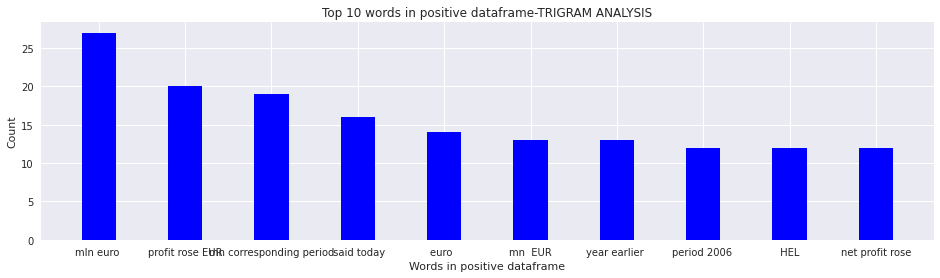

In [56]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='blue', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

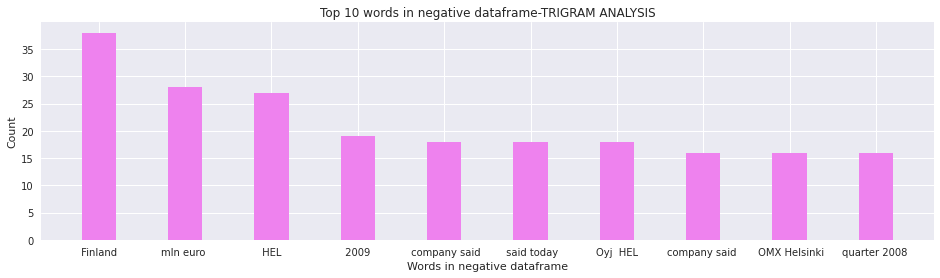

In [57]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='violet', width=0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-triigram.png")
plt.show()

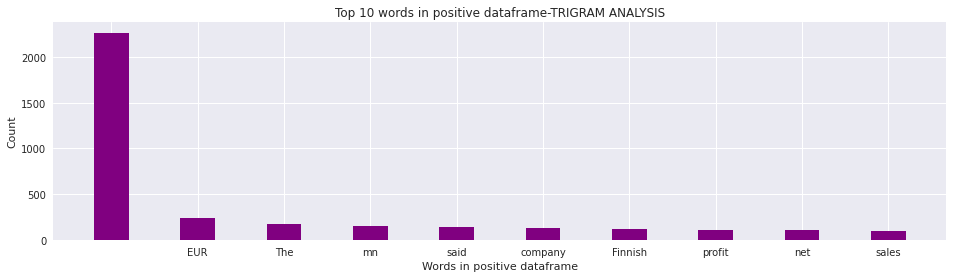

In [58]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='purple', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.show()